# Player Role Geometry using PCA
Real Data — Premier League 2024/25

In [1]:
import pandas as pd

In [2]:
shot_df = pd.read_csv("../data/Shots stats.csv")
standard_df = pd.read_csv("../data/Standard stats.csv")
possesion_df = pd.read_csv("../data/Possesion Stats.csv")
def_df = pd.read_csv("../data/Defensive Action.csv")

In [3]:
shot_df

,Player,Pos,Squad,Age,90s,Goals,Shots,Shots on Target,Avg Shot Distance,Free kick shots,PK shots,PK attempts,xG
0,Max Aarons,DF,Bournemouth,24.0,1.0,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00
1,Joshua Acheampong,DF,Chelsea,18.0,1.9,0.00,1.05,0.00,8.9,0.00,0.00,0.00,0.11
2,Tyler Adams,MF,Bournemouth,25.0,21.8,0.00,0.41,0.09,16.9,0.00,0.00,0.00,0.07
3,Tosin Adarabioyo,DF,Chelsea,26.0,15.7,0.06,0.83,0.13,12.5,0.00,0.00,0.00,0.06
4,Simon Adingra,"FW,MF",Brighton,22.0,12.2,0.16,2.70,0.66,17.0,0.00,0.00,0.00,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,Ashley Young,DF,Everton,39.0,20.8,0.05,0.29,0.14,24.5,0.14,0.00,0.00,0.01
570,Illia Zabarnyi,DF,Bournemouth,21.0,34.5,0.00,0.35,0.03,9.8,0.00,0.00,0.00,0.04
571,Oleksandr Zinchenko,"DF,MF",Arsenal,27.0,5.9,0.00,1.69,0.00,19.6,0.17,0.00,0.00,0.10
572,Joshua Zirkzee,"FW,MF",Manchester Utd,23.0,15.6,0.19,1.79,0.71,13.1,0.00,0.00,0.00,0.31


In [4]:
def_df.describe()

,Age,Tackles,Tackles in Def 3rd,Tackles in Mid 3rd,Tackles in Att 3rd,Blocks,Interceptions
count,573.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,25.047120,1.832439,0.861463,0.696847,0.274355,1.014652,0.726655
std,4.494699,2.129002,1.493993,1.115898,0.563808,0.999100,0.879292
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.890000,0.182500,0.210000,0.000000,0.490000,0.162500
50%,25.000000,1.530000,0.630000,0.560000,0.180000,0.960000,0.580000
75%,28.000000,2.417500,1.130000,0.920000,0.350000,1.330000,1.030000
max,39.000000,30.000000,20.000000,20.000000,10.000000,10.000000,10.000000


In [5]:
standard_df

,Player,Pos,Squad,Age,Min,Gls,Ast,Progressive Carries,Progressive Passes,Progressive Passes Recieved
0,Max Aarons,DF,Bournemouth,24.0,86,0.00,0.00,1.00,8.00,3.00
1,Joshua Acheampong,DF,Chelsea,18.0,170,0.00,0.00,0.00,4.21,0.00
2,Tyler Adams,MF,Bournemouth,25.0,"1,965",0.00,0.14,0.64,3.49,0.46
3,Tosin Adarabioyo,DF,Chelsea,26.0,"1,409",0.06,0.06,0.32,2.68,0.06
4,Simon Adingra,"FW,MF",Brighton,22.0,"1,097",0.16,0.16,4.10,1.48,11.10
...,...,...,...,...,...,...,...,...,...,...
569,Ashley Young,DF,Everton,39.0,"1,875",0.05,0.14,1.15,4.33,1.54
570,Illia Zabarnyi,DF,Bournemouth,21.0,"3,109",0.00,0.03,0.78,4.06,0.12
571,Oleksandr Zinchenko,"DF,MF",Arsenal,27.0,527,0.00,0.17,1.69,8.14,2.37
572,Joshua Zirkzee,"FW,MF",Manchester Utd,23.0,"1,402",0.19,0.06,0.90,2.82,4.42


In [6]:
possesion_df

,Player,Pos,Squad,Age,Touches,Touches in Def Pen,Touches in Def 1/3,Touches in Mid 1/3,Touches in Att 1/3,Att Pen,Live ball touches
0,Max Aarons,DF,Bournemouth,24.0,73.0,2.00,19.00,40.0,15.00,0.00,73.0
1,Joshua Acheampong,DF,Chelsea,18.0,72.1,3.68,25.30,42.6,4.21,1.58,72.1
2,Tyler Adams,MF,Bournemouth,25.0,61.3,2.84,16.00,35.7,10.30,0.83,61.3
3,Tosin Adarabioyo,DF,Chelsea,26.0,84.7,11.10,40.10,42.9,1.72,0.89,84.7
4,Simon Adingra,"FW,MF",Brighton,22.0,44.9,0.82,5.41,14.3,25.80,6.23,44.9
...,...,...,...,...,...,...,...,...,...,...,...
569,Ashley Young,DF,Everton,39.0,57.4,2.93,17.70,25.4,14.70,0.43,57.4
570,Illia Zabarnyi,DF,Bournemouth,21.0,59.8,6.78,26.90,31.2,2.23,0.46,59.8
571,Oleksandr Zinchenko,"DF,MF",Arsenal,27.0,84.6,2.71,14.60,39.5,30.70,3.39,84.6
572,Joshua Zirkzee,"FW,MF",Manchester Utd,23.0,37.6,1.03,4.55,19.4,14.00,3.59,37.6


In [7]:
standard_df["Min"].head()
standard_df["Min"].dtype

dtype('O')

In [8]:
standard_df["Min"] = (
    standard_df["Min"]
    .str.replace(",", "", regex=False)
    .astype(int)
)

In [9]:
standard_df['Min'].dtype

dtype('int64')

In [10]:
standard = standard_df[standard_df["Min"] >= 300]
standard = standard.reset_index(drop=True)

In [11]:
standard

,Player,Pos,Squad,Age,Min,Gls,Ast,Progressive Carries,Progressive Passes,Progressive Passes Recieved
0,Tyler Adams,MF,Bournemouth,25.0,1965,0.00,0.14,0.64,3.49,0.46
1,Tosin Adarabioyo,DF,Chelsea,26.0,1409,0.06,0.06,0.32,2.68,0.06
2,Simon Adingra,"FW,MF",Brighton,22.0,1097,0.16,0.16,4.10,1.48,11.10
3,Emmanuel Agbadou,DF,Wolves,27.0,1410,0.06,0.00,0.38,1.97,0.13
4,Ola Aina,DF,Nottingham Forest,27.0,2995,0.06,0.03,2.01,3.21,2.01
...,...,...,...,...,...,...,...,...,...,...
432,Ashley Young,DF,Everton,39.0,1875,0.05,0.14,1.15,4.33,1.54
433,Illia Zabarnyi,DF,Bournemouth,21.0,3109,0.00,0.03,0.78,4.06,0.12
434,Oleksandr Zinchenko,"DF,MF",Arsenal,27.0,527,0.00,0.17,1.69,8.14,2.37
435,Joshua Zirkzee,"FW,MF",Manchester Utd,23.0,1402,0.19,0.06,0.90,2.82,4.42


In [12]:
standard["Min"].describe()

count     437.000000
mean     1688.297483
std       922.034395
min       303.000000
25%       860.000000
50%      1655.000000
75%      2482.000000
max      3420.000000
Name: Min, dtype: float64

In [13]:
standard = standard.rename(columns={
    "Player": "player",
    "Squad": "team",
    "Min": "minutes",
})

In [14]:
possession = possesion_df.rename(columns={
    "Player": "player",
    "Touches": "touches",
    "Touches in Def Pen": "touches_def_pen",
    "Touches in Def 1/3": "touches_def_3rd",
    "Touches in Mid 1/3": "touches_mid_3rd",
    "Touches in Att 1/3": "touches_att_3rd",
    "Att Pen": "touches_att_pen"
})


In [15]:
defense = def_df.rename(columns={
    "Player": "player",
    "Tackles": "tackles",
    "Interceptions": "interceptions"
})


In [16]:
shot = shot_df.rename(columns={
    "Player": "player",
    "Shots": "shots",
    "xG": "xg"
})

In [17]:
df = (
    standard[["player", "team", "minutes"]]
    .merge(
        possession[[
            "player",
            "touches",
            "touches_def_pen",
            "touches_def_3rd",
            "touches_mid_3rd",
            "touches_att_3rd",
            "touches_att_pen"
        ]],
        on="player",
        how="inner"
    )
    .merge(
        defense[["player", "tackles", "interceptions"]],
        on="player",
        how="inner"
    )
    .merge(
        shot[['player', 'shots', 'xg']],
        on="player",
        how="inner"
    )
)


In [18]:
df = df.groupby("player", as_index=False).agg({
    'team': 'first',       # keeps the team name
    'minutes': 'mean',
    'touches': 'mean',
    'touches_def_pen': 'mean',
    'touches_def_3rd': 'mean',
    'touches_mid_3rd': 'mean',
    'touches_att_3rd': 'mean',
    'touches_att_pen': 'mean',
    'tackles': 'mean',
    'interceptions': 'mean',
    'shots': 'mean',
    'xg': 'mean'
})


In [19]:
df.shape

(432, 13)

In [20]:
df.isna().sum()

player             0
team               0
minutes            0
touches            0
touches_def_pen    0
touches_def_3rd    0
touches_mid_3rd    0
touches_att_3rd    0
touches_att_pen    0
tackles            0
interceptions      0
shots              0
xg                 0
dtype: int64

In [21]:
df.head()

,player,team,minutes,touches,touches_def_pen,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen,tackles,interceptions,shots,xg
0,Aaron Cresswell,West Ham United,824.0,74.7,4.89,29.30,35.70,10.20,0.22,1.20,0.87,0.54,0.02
1,Aaron Ramsdale,Southampton,2700.0,43.8,31.50,42.90,1.07,0.00,0.00,0.00,0.07,0.00,0.00
2,Aaron Wan-Bissaka,West Ham United,3154.0,64.5,4.20,19.50,27.70,18.20,1.37,2.00,1.89,0.46,0.03
3,Abdoulaye Doucouré,Everton,2564.0,40.7,1.12,7.89,18.90,14.50,2.28,1.68,0.35,1.09,0.14
4,Abdukodir Khusanov,Manchester City,503.0,79.5,8.04,36.60,37.70,5.54,0.18,0.89,0.54,0.18,0.00


In [22]:
df["touches_def_3rd_pct"] = df["touches_def_3rd"] / df["touches"]
df["touches_mid_3rd_pct"] = df["touches_mid_3rd"] / df["touches"]
df["touches_att_3rd_pct"] = df["touches_att_3rd"] / df["touches"]
df["touches_att_pen_pct"] = df["touches_att_pen"] / df["touches"]

In [23]:
df.head()

,player,team,minutes,touches,touches_def_pen,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen,tackles,interceptions,shots,xg,touches_def_3rd_pct,touches_mid_3rd_pct,touches_att_3rd_pct,touches_att_pen_pct
0,Aaron Cresswell,West Ham United,824.0,74.7,4.89,29.30,35.70,10.20,0.22,1.20,0.87,0.54,0.02,0.392236,0.477912,0.136546,0.002945
1,Aaron Ramsdale,Southampton,2700.0,43.8,31.50,42.90,1.07,0.00,0.00,0.00,0.07,0.00,0.00,0.979452,0.024429,0.000000,0.000000
2,Aaron Wan-Bissaka,West Ham United,3154.0,64.5,4.20,19.50,27.70,18.20,1.37,2.00,1.89,0.46,0.03,0.302326,0.429457,0.282171,0.021240
3,Abdoulaye Doucouré,Everton,2564.0,40.7,1.12,7.89,18.90,14.50,2.28,1.68,0.35,1.09,0.14,0.193857,0.464373,0.356265,0.056020
4,Abdukodir Khusanov,Manchester City,503.0,79.5,8.04,36.60,37.70,5.54,0.18,0.89,0.54,0.18,0.00,0.460377,0.474214,0.069686,0.002264


In [24]:
df[[
    "touches_def_3rd_pct",
    "touches_mid_3rd_pct",
    "touches_att_3rd_pct"
]].describe()


,touches_def_3rd_pct,touches_mid_3rd_pct,touches_att_3rd_pct
count,432.000000,432.000000,432.000000
mean,0.320351,0.410274,0.280086
std,0.241080,0.140302,0.194888
min,0.036546,0.000000,0.000000
25%,0.146049,0.367519,0.089810
50%,0.256429,0.437341,0.268767
75%,0.416953,0.493672,0.442156
max,1.000000,0.646209,0.763052


In [25]:
features = [
    # Spatial role
    "touches_def_3rd_pct",
    "touches_mid_3rd_pct",
    "touches_att_3rd_pct",
    "touches_att_pen_pct",

    # Activity & intensity
    "touches",
    "tackles",
    "interceptions",

    # Threat
    "shots",
    "xg"
]

In [26]:
X = df[features].dropna()

In [27]:
X

,touches_def_3rd_pct,touches_mid_3rd_pct,touches_att_3rd_pct,touches_att_pen_pct,touches,tackles,interceptions,shots,xg
0,0.392236,0.477912,0.136546,0.002945,74.7,1.20,0.87,0.54,0.02
1,0.979452,0.024429,0.000000,0.000000,43.8,0.00,0.07,0.00,0.00
2,0.302326,0.429457,0.282171,0.021240,64.5,2.00,1.89,0.46,0.03
3,0.193857,0.464373,0.356265,0.056020,40.7,1.68,0.35,1.09,0.14
4,0.460377,0.474214,0.069686,0.002264,79.5,0.89,0.54,0.18,0.00
...,...,...,...,...,...,...,...,...,...
427,0.306818,0.384740,0.313312,0.027273,61.6,1.79,0.64,0.81,0.03
428,0.292793,0.561562,0.153153,0.004805,66.6,3.14,1.15,0.71,0.04
429,0.375712,0.362429,0.282732,0.014231,52.7,2.36,1.42,0.57,0.02
430,0.142298,0.490862,0.377285,0.035379,76.6,1.01,0.53,1.09,0.13


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
X_scaled

array([[ 0.29852293,  0.48264529, -0.73737782, ...,  0.26819246,
        -0.63448054, -0.70269221],
       [ 2.73712239, -2.75327968, -1.43882762, ..., -1.19559962,
        -1.14880266, -0.82326138],
       [-0.07485651,  0.13688895,  0.01070736, ...,  2.13452737,
        -0.71067641, -0.64240762],
       ...,
       [ 0.22990172, -0.34140802,  0.01359392, ...,  1.27454952,
        -0.60590709, -0.70269221],
       [-0.73942241,  0.57505271,  0.49931665, ..., -0.35391917,
        -0.11063393, -0.03956176],
       [ 2.78203749, -2.85988862, -1.43882762, ..., -1.32368143,
        -1.14880266, -0.82326138]], shape=(432, 9))

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [31]:
pca.explained_variance_ratio_

array([0.47128178, 0.29350441])

In [32]:
pca_df = pd.DataFrame(
    X_pca,
    columns=["PC1", "PC2"]
)

pca_df["player"] = df.loc[X.index, "player"].values
pca_df["team"] = df.loc[X.index, "team"].values

In [33]:
pca_df

,PC1,PC2,player,team
0,-1.739760,0.384424,Aaron Cresswell,West Ham United
1,-2.337600,-4.349913,Aaron Ramsdale,Southampton
2,-1.396471,1.351854,Aaron Wan-Bissaka,West Ham United
3,0.714379,-0.163235,Abdoulaye Doucouré,Everton
4,-2.131274,-0.110535,Abdukodir Khusanov,Manchester City
...,...,...,...,...
427,-0.636348,0.068390,Yukinari Sugawara,Southampton
428,-1.541872,1.887373,Yves Bissouma,Tottenham Hotspur
429,-1.216056,0.533068,Álex Moreno,Nottingham Forest
430,0.049103,0.674225,İlkay Gündoğan,Manchester City


In [34]:
pd.DataFrame(
    pca.components_.T,
    index=features,
    columns=["PC1", "PC2"]
)

,PC1,PC2
touches_def_3rd_pct,-0.348888,-0.385848
touches_mid_3rd_pct,0.005938,0.541293
touches_att_3rd_pct,0.438066,0.094580
touches_att_pen_pct,0.457656,-0.045711
touches,-0.255691,0.359680
tackles,-0.077262,0.473576
interceptions,-0.192196,0.427428
shots,0.433498,0.101874
xg,0.425069,0.019290


In [35]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

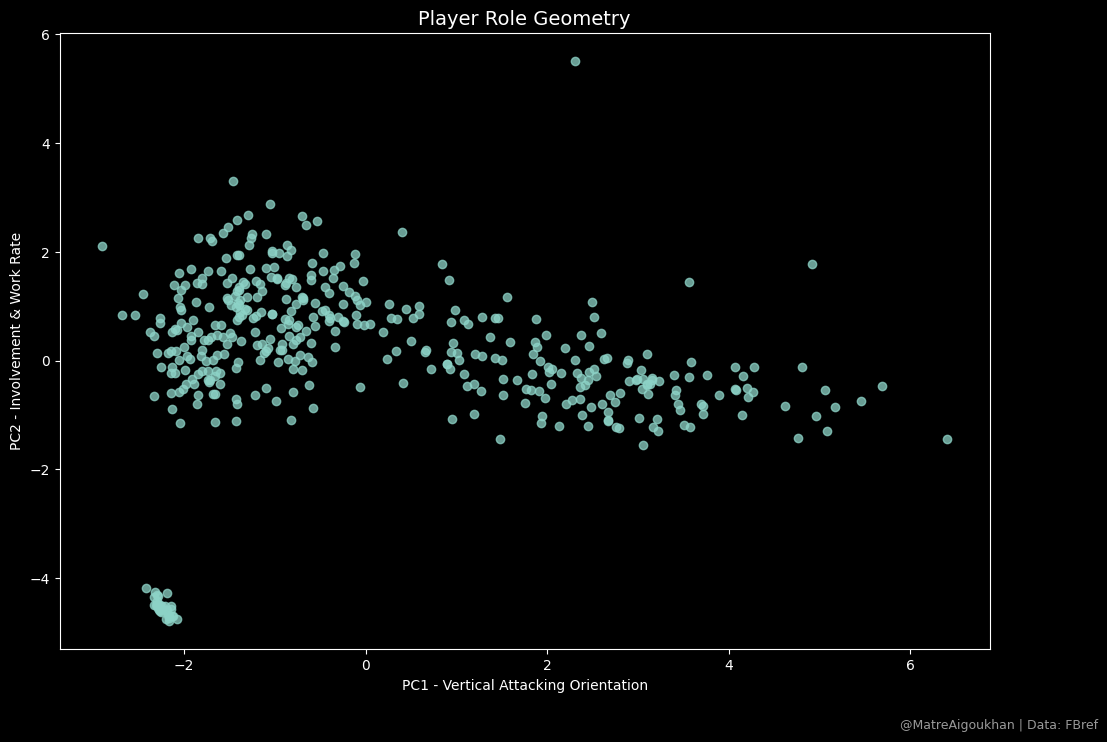

In [36]:
plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.75)

ax.set_title("Player Role Geometry", fontsize=14)
plt.xlabel("PC1 - Vertical Attacking Orientation")
plt.ylabel("PC2 - Involvement & Work Rate")

fig.text(
    0.99, 0.01,
    "@MatreAigoukhan | Data: FBref",
    ha="right",
    fontsize=9,
    alpha=0.6
)
plt.savefig("../visuals/pc1_vs_pc2", dpi=300, bbox_inches="tight")
plt.show()


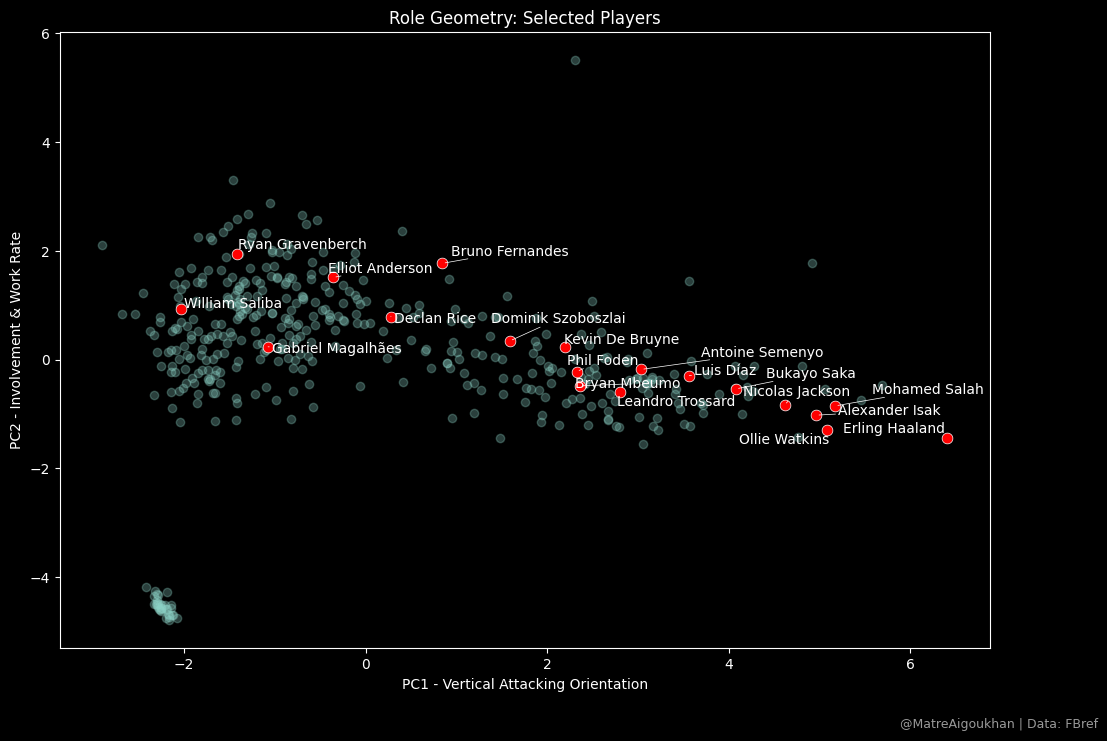

In [37]:
highlight = [
    "Erling Haaland", "Kevin De Bruyne", "Bukayo Saka", "Leandro Trossard", "Bryan Mbeumo", "Ryan Gravenberch",
    "William Saliba", "Ollie Watkins","Alexander Isak", "Luis Díaz", "Kevin De Bruyne", "Phil Foden", "Dominik Szoboszlai",
    "Mohamed Salah", "Gabriel Magalhães", "Bruno Fernandes","Antoine Semenyo", "Declan Rice", "Elliot Anderson", "Nicolas Jackson"
]

subset = pca_df[pca_df["player"].isin(highlight)]

plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter( 
    pca_df["PC1"], pca_df["PC2"],
    alpha=0.3
)

ax.scatter(
    subset["PC1"], subset["PC2"],
    c="red", s=60, edgecolors="white", linewidths=0.5
)

texts = []
for _, row in subset.iterrows():
    texts.append(
        ax.text(row["PC1"], row["PC2"], row["player"], fontsize=10)
    )

adjust_text(
    texts,
    only_move={'points':'y', 'texts':'y'},  # move vertically only to reduce collisions
    arrowprops=dict(arrowstyle="-", color='white', lw=0.5)  # optional arrows pointing to points
)

ax.set_xlabel("PC1 - Vertical Attacking Orientation")
ax.set_ylabel("PC2 - Involvement & Work Rate")
ax.set_title("Role Geometry: Selected Players")

fig.text(
    0.99, 0.01,
    "@MatreAigoukhan | Data: FBref",
    ha="right",
    fontsize=9,
    alpha=0.6
)

plt.savefig("../visuals/role_geometry_selected_players.png", dpi=300, bbox_inches="tight")
plt.show()



In [38]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(pca_df[["PC1", "PC2"]])
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=pca_df["player"],
    columns=pca_df["player"]
)

In [39]:
def most_similar_players(player_name, top_n=5):
    sims = similarity_df[player_name].sort_values(ascending=False)
    return sims.iloc[1:top_n+1]

In [40]:
similarity_df.head()

player,Aaron Cresswell,Aaron Ramsdale,Aaron Wan-Bissaka,Abdoulaye Doucouré,Abdukodir Khusanov,Abdul Fatawu Issahaku,Adam Armstrong,Adam Lallana,Adam Smith,Adam Webster,...,Yasin Ayari,Yehor Yarmoliuk,Yerson Mosquera,Yoane Wissa,Youri Tielemans,Yukinari Sugawara,Yves Bissouma,Álex Moreno,İlkay Gündoğan,Łukasz Fabiański
player,,,,,,,,,,,,,,,,,,,,,
Aaron Cresswell,1.000000,0.272164,0.851637,-0.999974,0.963961,-0.646732,-0.985533,0.824096,0.972203,0.970250,...,0.356154,0.811947,0.993604,-0.999842,0.551545,0.993911,0.784851,0.980919,0.144263,0.246260
Aaron Ramsdale,0.272164,1.000000,-0.272562,-0.265254,0.518356,-0.909942,-0.105141,-0.320778,0.489899,0.031101,...,-0.802222,-0.340714,0.161764,-0.255007,-0.652547,0.376531,-0.382685,0.079894,-0.912922,0.999640
Aaron Wan-Bissaka,0.851637,-0.272562,1.000000,-0.855375,0.681503,-0.151016,-0.928148,0.998725,0.705244,0.953196,...,0.793077,0.997436,0.905375,-0.860824,0.906918,0.788701,0.993205,0.937286,0.641509,-0.298267
Abdoulaye Doucouré,-0.999974,-0.265254,-0.855375,1.000000,-0.962028,0.641244,0.986724,-0.828138,-0.970499,-0.971962,...,-0.362847,-0.816113,-0.994388,0.999944,-0.557514,-0.993095,-0.789275,-0.982289,-0.151357,-0.239302
Abdukodir Khusanov,0.963961,0.518356,0.681503,-0.962028,1.000000,-0.826340,-0.904926,0.643696,0.999457,0.870873,...,0.094720,0.627387,0.927754,-0.959077,0.309748,0.987405,0.591702,0.893845,-0.124196,0.495236


In [41]:
most_similar_players("Declan Rice", top_n=10)

player
Bilal El Khannouss    1.000000
Carlos Alcaraz        0.998283
Nico O’Reilly         0.995906
Bernardo Silva        0.995850
Enzo Fernández        0.995077
Bruno Fernandes       0.994149
Ross Barkley          0.985325
Curtis Jones          0.981677
Facundo Buonanotte    0.976921
Justin Devenny        0.969807
Name: Declan Rice, dtype: float64

In [42]:
most_similar_players("Erling Haaland", top_n=10)

player
Dominic Calvert-Lewin    1.000000
Abdoulaye Doucouré       0.999996
Andreas Pereira          0.999995
Jacob Murphy             0.999994
Kai Havertz              0.999989
Leandro Trossard         0.999960
Harvey Barnes            0.999951
Wilson Odobert           0.999928
Callum Wilson            0.999927
Yoane Wissa              0.999908
Name: Erling Haaland, dtype: float64

In [43]:
most_similar_players("Bukayo Saka", top_n=10)

player
Patson Daka       1.000000
Mohammed Kudus    1.000000
Omar Marmoush     0.999999
Jarrod Bowen      0.999995
Richarlison       0.999995
Taiwo Awoniyi     0.999992
Enes Ünal         0.999990
Paul Onuachu      0.999977
João Pedro        0.999951
Cody Gakpo        0.999918
Name: Bukayo Saka, dtype: float64

In [44]:
most_similar_players("Ollie Watkins", top_n=10)

player
Jean-Philippe Mateta     0.999980
Dominic Solanke          0.999961
Yoane Wissa              0.999882
Callum Wilson            0.999859
Son Heung-min            0.999784
Kai Havertz              0.999707
Abdoulaye Doucouré       0.999663
Erling Haaland           0.999583
Dominic Calvert-Lewin    0.999580
Andreas Pereira          0.999482
Name: Ollie Watkins, dtype: float64

In [45]:
pca_full = pca.transform(X_scaled)[:, :4]

similarity_full = cosine_similarity(pca_full)

similarity_full_df = pd.DataFrame(
    similarity_full,
    index=pca_df["player"],
    columns=pca_df["player"]
)

In [46]:
def find_similar_players(player, top_n=5):
    sims = similarity_full_df[player].sort_values(ascending=False)
    return sims.iloc[1:top_n+1]

In [47]:
find_similar_players("Ollie Watkins")

player
Jean-Philippe Mateta    0.999980
Dominic Solanke         0.999961
Yoane Wissa             0.999882
Callum Wilson           0.999859
Son Heung-min           0.999784
Name: Ollie Watkins, dtype: float64

In [48]:
find_similar_players("Mohamed Salah", top_n=10)

player
Beto               1.000000
Justin Kluivert    0.999988
Dwight McNeil      0.999987
Darwin Núñez       0.999986
Danny Welbeck      0.999977
Nicolas Jackson    0.999868
Anthony Gordon     0.999834
Cody Gakpo         0.999823
Brennan Johnson    0.999762
Mathys Tel         0.999749
Name: Mohamed Salah, dtype: float64

In [49]:
find_similar_players("Antoine Semenyo", top_n=10)

player
Conor Chaplin         0.999998
Kaoru Mitoma          0.999998
Dejan Kulusevski      0.999997
Tyler Dibling         0.999985
Eddie Nketiah         0.999975
Raúl Jiménez          0.999962
Brajan Gruda          0.999858
Alejandro Garnacho    0.999853
Donyell Malen         0.999740
Luis Díaz             0.999723
Name: Antoine Semenyo, dtype: float64

In [59]:
target = "Mohamed Salah"
neighbors = find_similar_players(target, top_n=10)

neighbors

player
Beto               1.000000
Justin Kluivert    0.999988
Dwight McNeil      0.999987
Darwin Núñez       0.999986
Danny Welbeck      0.999977
Nicolas Jackson    0.999868
Anthony Gordon     0.999834
Cody Gakpo         0.999823
Brennan Johnson    0.999762
Mathys Tel         0.999749
Name: Mohamed Salah, dtype: float64

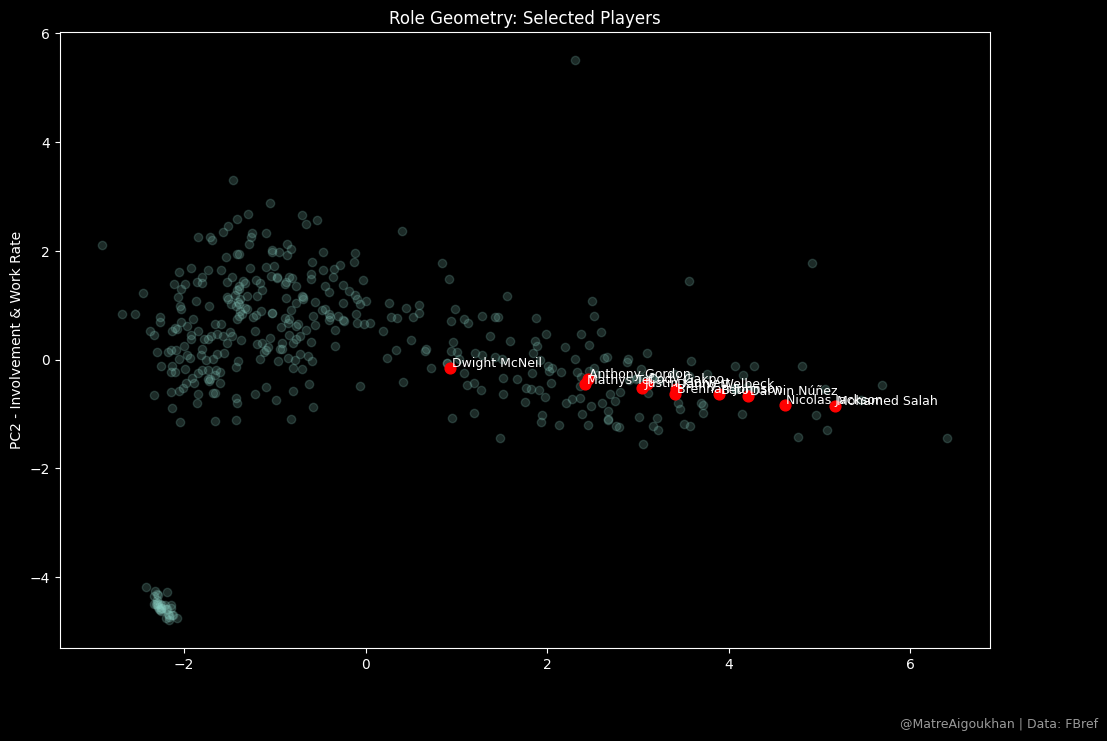

In [60]:
plot_players = [target] + neighbors.index.tolist()
plot_df = pca_df[pca_df["player"].isin(plot_players)]

plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(12, 8))

# All players (background)
ax.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.2)

# Neighborhood
ax.scatter(
    plot_df["PC1"],
    plot_df["PC2"],
    c="red", s=60
)

for _, row in plot_df.iterrows():
    ax.text(
        row["PC1"] + 0.02,
        row["PC2"] + 0.02,
        row["player"],
        fontsize=9
    )

ax.set_title(f"Role Similarity Neighborhood — {target}")
ax.set_ylabel("PC2 - Involvement & Work Rate")
ax.set_title("Role Geometry: Selected Players")


fig.text(
    0.99, 0.01,
    "@MatreAigoukhan | Data: FBref",
    ha="right",
    fontsize=9,
    alpha=0.6
)

plt.show()

In [61]:
target = "Declan Rice"
neighbors = find_similar_players(target, top_n=10)

neighbors

player
Bilal El Khannouss    1.000000
Carlos Alcaraz        0.998283
Nico O’Reilly         0.995906
Bernardo Silva        0.995850
Enzo Fernández        0.995077
Bruno Fernandes       0.994149
Ross Barkley          0.985325
Curtis Jones          0.981677
Facundo Buonanotte    0.976921
Justin Devenny        0.969807
Name: Declan Rice, dtype: float64

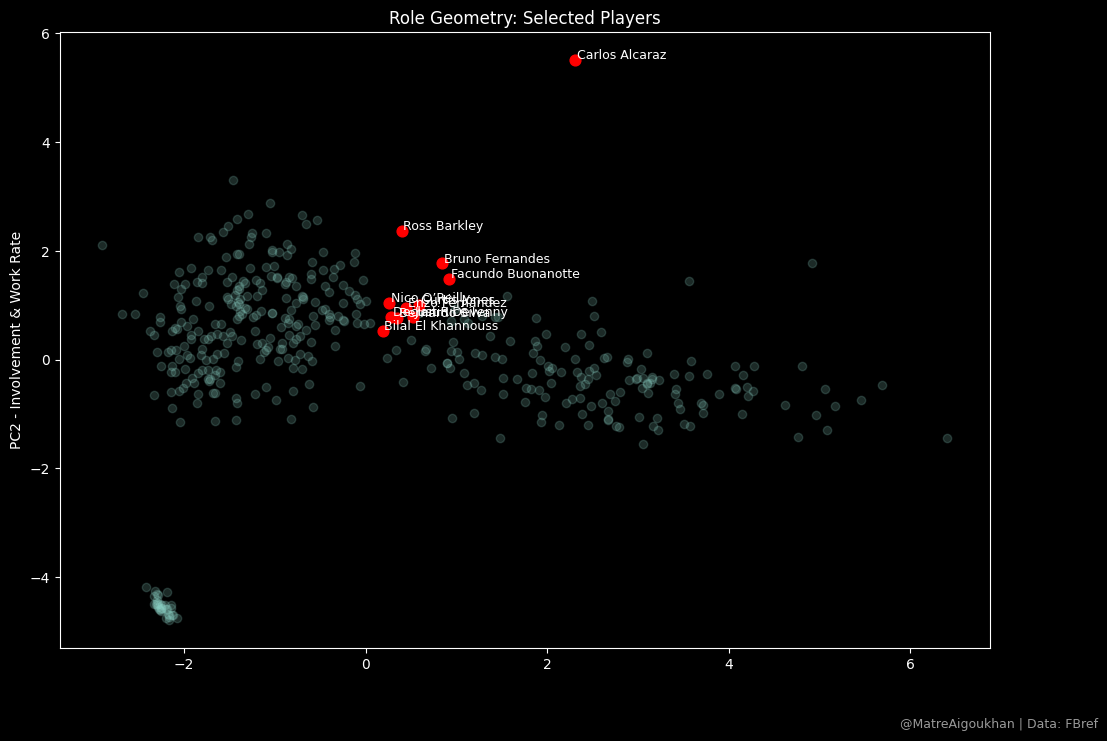

In [62]:
plot_players = [target] + neighbors.index.tolist()
plot_df = pca_df[pca_df["player"].isin(plot_players)]

plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(12, 8))

# All players (background)
ax.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.2)

# Neighborhood
ax.scatter(
    plot_df["PC1"],
    plot_df["PC2"],
    c="red", s=60
)

for _, row in plot_df.iterrows():
    ax.text(
        row["PC1"] + 0.02,
        row["PC2"] + 0.02,
        row["player"],
        fontsize=9
    )

ax.set_title(f"Role Similarity Neighborhood — {target}")
ax.set_ylabel("PC2 - Involvement & Work Rate")
ax.set_title("Role Geometry: Selected Players")


fig.text(
    0.99, 0.01,
    "@MatreAigoukhan | Data: FBref",
    ha="right",
    fontsize=9,
    alpha=0.6
)

plt.show()

In [63]:
target = "Cole Palmer"
neighbors = find_similar_players(target, top_n=10)

neighbors

player
Nathan Broadhead      0.999952
Georginio Rutter      0.999792
Alex Iwobi            0.999781
Marshall Munetsi      0.999651
Simon Adingra         0.999601
Christopher Nkunku    0.999381
Gonçalo Guedes        0.999264
Martin Ødegaard       0.999261
Kasey McAteer         0.999248
David Brooks          0.998967
Name: Cole Palmer, dtype: float64

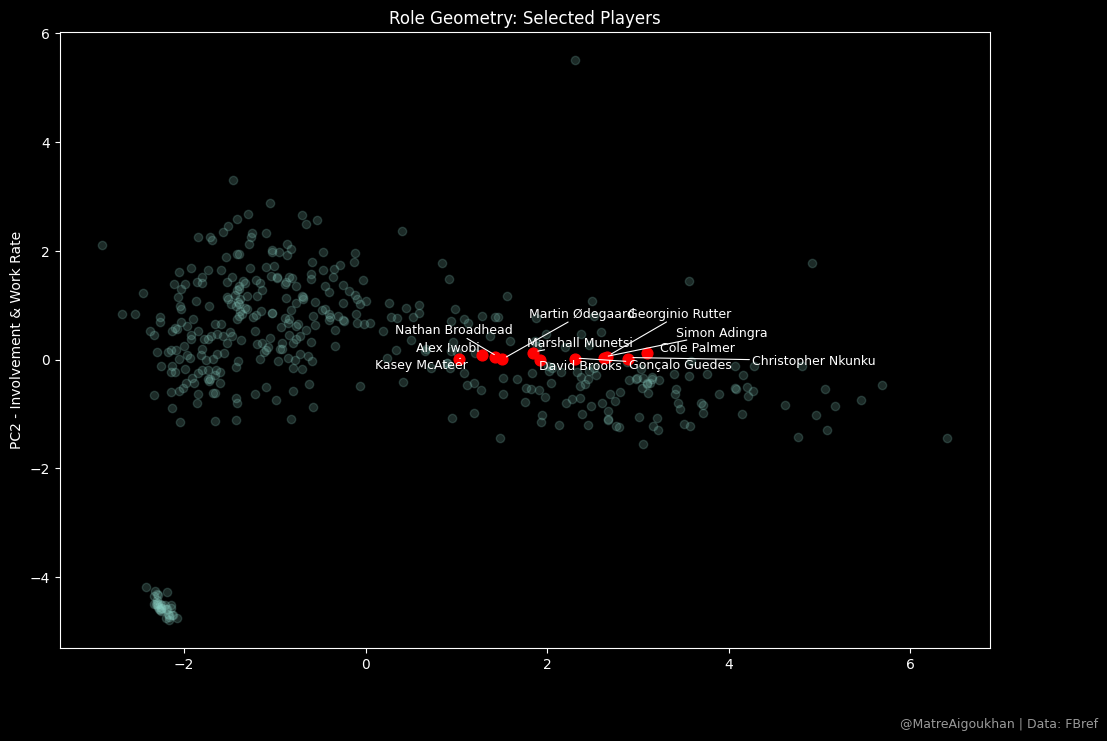

In [71]:
plot_players = [target] + neighbors.index.tolist()
plot_df = pca_df[pca_df["player"].isin(plot_players)]

plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(12, 8))

# All players (background)
ax.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.2)

# Neighborhood
ax.scatter(
    plot_df["PC1"],
    plot_df["PC2"],
    c="red", s=60
)

texts = []
for _, row in plot_df.iterrows():
    texts.append(
            ax.text(
        row["PC1"] + 0.02,
        row["PC2"] + 0.02,
        row["player"],
        fontsize=9
        
    ))


adjust_text(
    texts,
    only_move={'points':'y', 'texts':'y'},  # move vertically only to reduce collisions
    arrowprops=dict(arrowstyle="-", color='white', lw=0.8)  # optional arrows pointing to points
)

ax.set_title(f"Role Similarity Neighborhood — {target}")
ax.set_ylabel("PC2 - Involvement & Work Rate")
ax.set_title("Role Geometry: Selected Players")

fig.text(
    0.99, 0.01,
    "@MatreAigoukhan | Data: FBref",
    ha="right",
    fontsize=9,
    alpha=0.6
)

plt.show()